In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

## Konfigurasi Kaggle dan Google Drive

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Pembelajaran Mesin'

In [ ]:
%cd /content/drive/MyDrive/Pembelajaran\ Mesin

/content/drive/.shortcut-targets-by-id/10c4Aw_2TfyRbC13KKGL0g5i-OqZIWoJI/Pembelajaran Mesin


In [ ]:
!ls

 flowers   kaggle.json	 tes  'Tugas Kelompok'


## Download Data set dari Kaggle

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 450M/450M [00:04<00:00, 133MB/s]



In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b

In [ ]:
!ls ./flowers/sunflower

1008566138_6927679c8a.jpg     3894586562_5dbbdc4354_n.jpg
1022552002_2b93faf9e7_n.jpg   3897174387_07aac6bf5f_n.jpg
1022552036_67d33d5bd8_n.jpg   3912497870_a2f91c3a65_n.jpg
10386503264_e05387e1f7_m.jpg  3912497888_e7a5905bc3_n.jpg
10386522775_4f8c616999_m.jpg  3920137864_e922ab25b4_n.jpg
10386525005_fd0b7d6c55_n.jpg  3922005347_7b6fb82fcd.jpg
10386525695_2c38fea555_n.jpg  39271782_b4335d09ae_n.jpg
10386540106_1431e73086_m.jpg  3946535195_9382dcb951_n.jpg
10386540696_0a95ee53a8_n.jpg  3946535709_78613461cb_n.jpg
10386702973_e74a34c806_n.jpg  3950020811_dab89bebc0_n.jpg
1043442695_4556c4c13d_n.jpg   3951246342_930138610b_n.jpg
1044296388_912143e1d4.jpg     4019748730_ee09b39a43.jpg
10541580714_ff6b171abd_n.jpg  40410686_272bc66faf_m.jpg
1064662314_c5a7891b9f_m.jpg   40410814_fba3837226_n.jpg
10862313945_e8ed9202d9_m.jpg  40410963_3ac280f23a_n.jpg
11881770944_22b4f2f8f6_n.jpg  40411019_526f3fc8d9_m.jpg
1217254584_4b3028b93d.jpg     40411100_7fbe10ec0f_n.jpg
12282924083_fb80aa17d4_n.jpg  

## Cek Jumlah Data set

In [ ]:
# %cd flowers/dandelion
# %cd ../rose
%cd ../sunflower

!ls -l | grep ^- | wc -l

/content/drive/.shortcut-targets-by-id/10c4Aw_2TfyRbC13KKGL0g5i-OqZIWoJI/Pembelajaran Mesin/flowers/sunflower
734


# Fungsi-Fungsi

In [5]:
import os, cv2, random
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

## Inisialisasi Arsitektur

In [6]:
def arch(input_size=2, hidden_size=2, output_size=2):
  arch={}
  arch['input']=np.zeros(input_size); arch['hidden']=np.zeros(hidden_size); arch['output']=np.zeros(output_size)

  weight=[]
  hid={'i_h'+str(i+1):np.zeros(input_size) for i in range(hidden_size)}
  weight.append(hid)
  out={'h_o'+str(i+1):np.zeros(hidden_size) for i in range(output_size)}
  weight.append(hid)
  arch['weights']=np.array(weight)
  arch['bias']=np.array([np.zeros(hidden_size), np.zeros(output_size)])

  return arch

In [7]:
arch(10,5,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


{'bias': array([array([0., 0., 0., 0., 0.]), array([0., 0.])], dtype=object),
 'hidden': array([0., 0., 0., 0., 0.]),
 'input': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'output': array([0., 0.]),
 'weights': array([{'i_h1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h5': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
        {'i_h1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'i_h5': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}],
       dtype=object)}

## Pemrosesan Citra (load, resize, grayscale)

In [8]:
def loadImages(path):
  image_files = [cv2.imread(os.path.join(path, file)) for file in os.listdir(path)[0:100]] # Mengambil image dari directory drive
  return image_files

def resizeImages(dim, images):
  image_files = [cv2.resize(image, dim, interpolation = cv2.INTER_AREA) for image in images] # Resize gambar menjadi dimensi yang ditentukan
  return image_files

def grayscaleImages(images):
  image_files = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images] # Color image processing dari rgb menjadi grayscale
  return image_files

In [9]:
def ImageProcessing(path):
  dim = (320, 240) # Ukuran resize
  images=loadImages(path)
  images=resizeImages(dim, images)
  images=grayscaleImages(images)
  return images

## Visualisasi dan Analisis Citra

In [27]:
def visualizeImages(image, name):
  plt.figure(figsize=(8,6))
  plt.hist(sunflowers[0], bins='auto')
  plt.title('Histogram'+name)
  plt.xlabel('Gray Level')
  plt.ylabel('Occurence (# of pixels)')
  plt.show()

In [28]:
def visualizeHistogramAvg(data, name):
  plt.figure(figsize=(8,6))
  plt.bar([i for i in range(256)], data)
  plt.title('Histogram Average for '+name)
  plt.xlabel('Gray Level')
  plt.ylabel('Average Occurence (# of pixels)')
  plt.show()

## Splitting dan Shuffling Data

In [10]:
def data_splitting(data, train_size):
  train_num=int(train_size*len(data[0])); test_num=int(len(data[0])-train_num)
  
  X_train = data[0][:train_num]+data[1][:train_num]+data[2][:train_num]
  X_test = data[0][-test_num:]+data[1][-test_num:]+data[2][-test_num:]
  y_train = [[1,1] for i in range(train_num)]+[[1,0] for i in range(train_num)]+[[0,1] for i in range(train_num)]
  y_test = [[1,1] for i in range(test_num)]+[[1,0] for i in range(test_num)]+[[0,1] for i in range(test_num)]

  return X_train, X_test, y_train, y_test

In [11]:
def data_shuffling(X_train, X_test, y_train, y_test):
  train=list(zip(X_train, y_train))
  random.shuffle(train)
  X_train=[data[0] for data in train]
  y_train=[data[-1] for data in train]

  test=list(zip(X_test, y_test))
  random.shuffle(test)
  X_test=[data[0] for data in test]
  y_test=[data[-1] for data in test]
  return X_train, X_test, y_train, y_test

## Backpropagation

In [12]:
def sigmoid(z):
  return 1/(1+np.exp(-np.array(z)))

In [13]:
def init_bobot(mlp):
  weights=[]
  hid={'i_h'+str(i+1):np.full(len(mlp['input']),0) for i in range(len(mlp['hidden']))}; weights.append(hid)
  out={'h_o'+str(i+1):np.full(len(mlp['hidden']),0) for i in range(len(mlp['output']))}; weights.append(out)
  mlp['weights']=weights; 
  mlp['bias']=np.array([
     np.full(len(mlp['hidden']),0, np.float64),
     np.full(len(mlp['output']),0, np.float64)
  ])

  return mlp

In [14]:
def hitung_error(y, target):
  y=np.array(y); target=np.array(target)
  errors = np.power(np.subtract(y,target),2)
  return np.sum(errors, axis=1)

### Feed Forward

In [15]:
def hitung_hidden(mlp):
  h_layer=mlp['weights'][0];
  hidden_neuron=sigmoid((np.dot(mlp['input'][np.newaxis,:],
                                np.array(list(h_layer.values())).transpose())).flatten()+mlp['bias'][0])
  return hidden_neuron

def hitung_output(mlp):
  o_layer=mlp['weights'][1]; 
  output_neuron=sigmoid((np.dot(mlp['hidden'][np.newaxis,:],
                                np.array(list(o_layer.values())).transpose())).flatten()+mlp['bias'][1])
  return output_neuron

In [16]:
def feed_forward(mlp):
  hidden_neuron=hitung_hidden(mlp)
  mlp['hidden']=hidden_neuron
  y=hitung_output(mlp)
  return mlp, y

### Backward

In [17]:
def update_hid_out(mlp, y, lr=0.1):
  o_layer=mlp['weights'][1]
  der=-2*(mlp['output']-y)*y*(1-y)
  E_der=np.array(list(mlp['weights'][1].values())).transpose()*der
  delta=np.dot(der[np.newaxis,:].transpose(), mlp['hidden'][np.newaxis,:])
  new_weight=np.array(list(o_layer.values()))-lr*delta
  mlp['bias'][1]-=lr*der

  for i in range(len(o_layer)):
    o_layer['h_o'+str(i+1)]=new_weight[i]
  
  return E_der, mlp

In [18]:
def update_in_hid(mlp, y, E_der, lr=0.1):
  h_layer=mlp['weights'][0];
  hidden_error=np.sum(E_der,axis=1)
  der=hidden_error*mlp['hidden']*(1-mlp['hidden'])
  delta=np.dot(der[np.newaxis,:].transpose(), mlp['input'][np.newaxis,:])
  new_weight=np.array(list(h_layer.values()))-lr*delta
  mlp['bias'][0]-=lr*der

  for i in range(len(h_layer)):
    h_layer['i_h'+str(i+1)]=new_weight[i]
  
  return mlp

In [19]:
def backward(mlp,y, lr=0.1):
  Eror_der, mlp=update_hid_out(mlp,y, lr)
  mlp=update_in_hid(mlp,y, Eror_der, lr)
  return mlp

### Prediksi-Akurasi

In [20]:
def prediksi(y):
  threshold = 0.5
  return [1 if neuron >= threshold else 0 for neuron in y]

In [21]:
def accuracy(y, target):
  counter = 0
  for index in range(len(y)):
    if y[index] == target[index]:
      counter += 1
  return (counter / len(y)) * 100

## Training dan Testing

In [22]:
def train(X_train, y_train, mlp,lr):
  res_train = []; train_predict=[];
  for i in range(len(X_train)):
    mlp['input']=X_train[i].flatten()
    mlp['output']=np.array(y_train[i])
    mlp, y=feed_forward(mlp)
    res_train.append(y) 
    y_train_pred = prediksi(y)
    train_predict.append(y_train_pred)
    mlp=backward(mlp, y, lr)

  error = hitung_error(res_train, y_train)
  acc = accuracy(train_predict, y_train)
  print('train_loss:',np.mean(error),"train_acc:",acc, end=' ')

  error_train.append(error)
  acc_train.append(acc)

def test(X_test, y_test, mlp, lr):
  res_val = []; val_predict=[];
  for i in range(len(X_test)):
    mlp['input']=X_test[i].flatten()
    mlp['output']=np.array(y_test[i])
    _, y=feed_forward(mlp)
    res_val.append(y) 
    y_pred = prediksi(y)
    val_predict.append(y_pred)

  error = hitung_error(res_val, y_test)
  acc = accuracy(val_predict, y_test)
  print('val_loss:',np.mean(error)," val_acc:",acc)

  error_val.append(error)
  acc_val.append(acc)

In [23]:
def training(X_train, y_train, mlp, epoch, lr):
  for i in range(epoch):
    print('Epoch-',(i+1),sep='')
    train(X_train, y_train, mlp, lr)
    test(X_test, y_test, mlp, lr)
    print()

# Main Code

### Data Citra

In [24]:
image_path = "/content/drive/MyDrive/Pembelajaran Mesin/flowers"
sunflowers=ImageProcessing(image_path + '/sunflower')
dandelions = ImageProcessing(image_path + '/dandelion')
roses = ImageProcessing(image_path + '/rose')

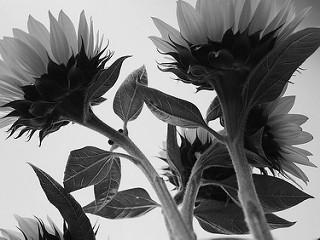

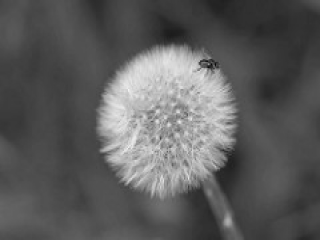

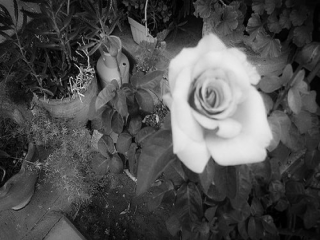

In [25]:
cv2_imshow(sunflowers[-2])
cv2_imshow(dandelions[-2])
cv2_imshow(roses[-2])

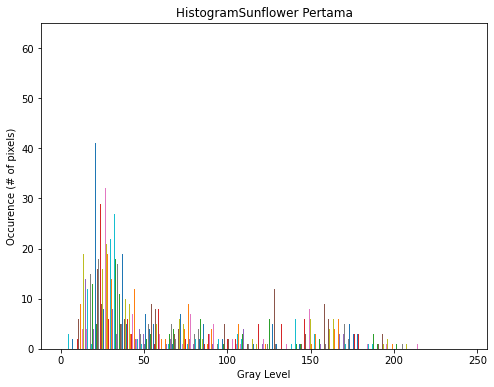

In [29]:
visualizeImages(sunflowers[0],'Sunflower Pertama')

In [30]:
sunflowers_hist_avg = [0 for i in range(256)]
dandelions_hist_avg = [0 for i in range(256)]
roses_hist_avg = [0 for i in range(256)]

In [31]:
for sunflower in sunflowers:
  for i in range(240):
    for j in range(320):
      sunflowers_hist_avg[sunflower[i][j]] += 1

for i in range(256):
  sunflowers_hist_avg[i] /= 100

In [32]:
for dandelion in dandelions:
  for i in range(240):
    for j in range(320):
      dandelions_hist_avg[dandelion[i][j]] += 1

for i in range(256):
  dandelions_hist_avg[i] /= 100

In [33]:
for rose in roses:
  for i in range(240):
    for j in range(320):
      roses_hist_avg[rose[i][j]] += 1

for i in range(256):
  roses_hist_avg[i] /= 100

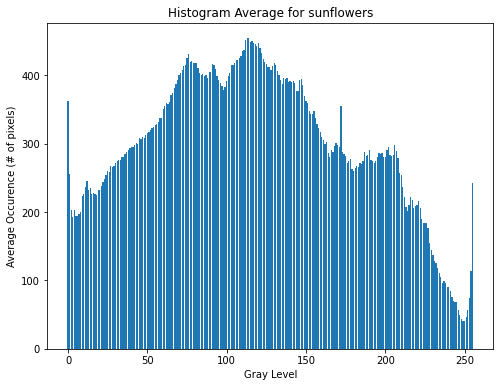

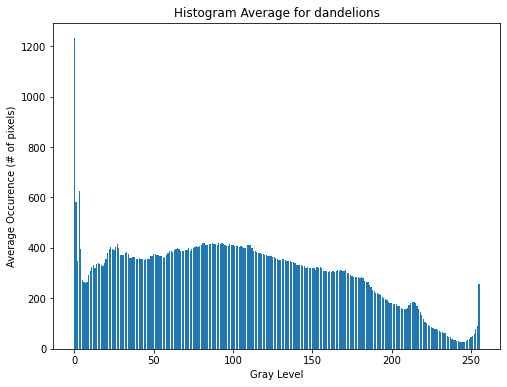

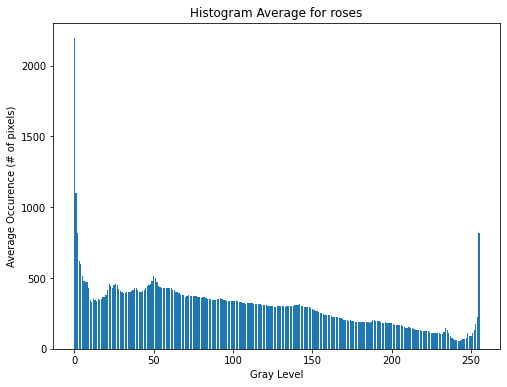

In [34]:
visualizeHistogramAvg(sunflowers_hist_avg, 'sunflowers')
visualizeHistogramAvg(dandelions_hist_avg, 'dandelions')
visualizeHistogramAvg(roses_hist_avg, 'roses')

In [43]:
data=[sunflowers, dandelions, roses]
X_train, X_test, y_train, y_test=data_splitting(data, 0.8)

In [48]:
X_train, X_test, y_train, y_test=data_shuffling(X_train, X_test, y_train, y_test)

## Neural Network

**Arsitektur MLP:** <br>
Input layer sebanyak **76800 neuron** (sama dengan jumlah pixel citra), Hidden layer sebanyak 1 layer dengan **128 neuron**, dan Output layer sebanyak **2 neuron** <br>
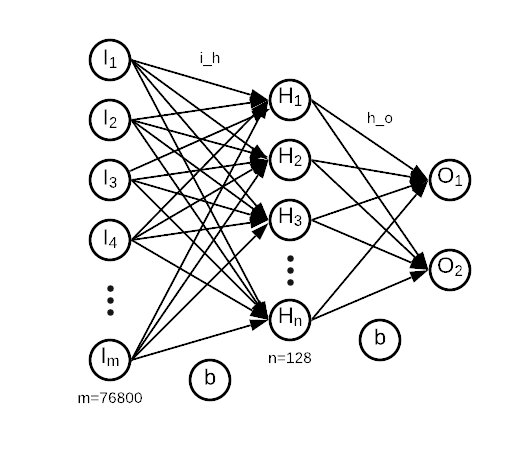

### Eksperimen untuk learning rate=0.1

In [53]:
mlp=arch(76800, 128, 2)
mlp=init_bobot(mlp)
epoch=50; lr=0.1

error_train = []; acc_train=[]; error_val = []; acc_val=[]
training(X_train, y_train, mlp, epoch, lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Epoch-1
train_loss: 0.6780513026990189 train_acc: 28.749999999999996 val_loss: 0.5334430406724956  val_acc: 33.33333333333333

Epoch-2
train_loss: 0.6728951165166118 train_acc: 28.333333333333332 val_loss: 0.5193829157600744  val_acc: 33.33333333333333

Epoch-3
train_loss: 0.6773359242358065 train_acc: 28.749999999999996 val_loss: 0.5334087238290067  val_acc: 33.33333333333333

Epoch-4
train_loss: 0.6764931450534504 train_acc: 29.166666666666668 val_loss: 0.5194872729281252  val_acc: 33.33333333333333

Epoch-5
train_loss: 0.6719337485275676 train_acc: 28.749999999999996 val_loss: 0.5187767665939734  val_acc: 33.33333333333333

Epoch-6
train_loss: 0.6682402368805491 train_acc: 31.25 val_loss: 0.5287677176712139  val_acc: 33.33333333333333

Epoch-7
train_loss: 0.6773115954520431 train_acc: 27.916666666666668 val_loss: 0.5194461258576141  val_acc: 33.33333333333333

Epoch-8
train_loss: 0.6697052578127004 train_acc: 30.0 val_loss: 0.5333474658302486  val_acc: 33.33333333333333

Epoch-9
tra

Text(0.5, 1.0, 'Grafik Epochs vs Accuracy untuk lr=0.1')

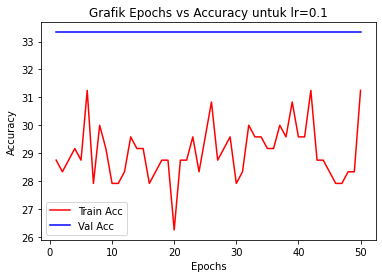

In [54]:
plt.figure()
plt.plot(np.arange(1,51), acc_train, 'r', label='Train Acc')
plt.plot(np.arange(1,51), acc_val, 'b', label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Grafik Epochs vs Accuracy untuk lr=0.1")

Text(0.5, 1.0, 'Grafik Epochs vs Loss untuk lr=0.1')

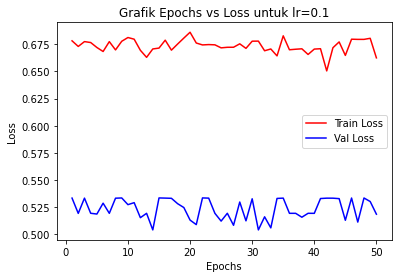

In [55]:
loss_train=np.mean(error_train,axis=1)
loss_val=np.mean(error_val,axis=1)
plt.plot(np.arange(1,51), loss_train, 'r', label='Train Loss')
plt.plot(np.arange(1,51), loss_val, 'b', label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Grafik Epochs vs Loss untuk lr=0.1")

### Eksperimen untuk learning rate=0.8

In [50]:
mlp=arch(76800, 128, 2)
mlp=init_bobot(mlp)
epoch=50; lr=0.8

error_train = []; acc_train=[]; error_val = []; acc_val=[]
training(X_train, y_train, mlp, epoch, lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Epoch-1
train_loss: 0.6687469452885811 train_acc: 33.33333333333333 val_loss: 0.6666635367234132  val_acc: 33.33333333333333

Epoch-2
train_loss: 0.6666634752536109 train_acc: 33.33333333333333 val_loss: 0.6666634105448488  val_acc: 33.33333333333333

Epoch-3
train_loss: 0.6666633439485324 train_acc: 33.33333333333333 val_loss: 0.6666632737670855  val_acc: 33.33333333333333

Epoch-4
train_loss: 0.6666632013751322 train_acc: 33.33333333333333 val_loss: 0.6666631249961887  val_acc: 33.33333333333333

Epoch-5
train_loss: 0.6666630460177493 train_acc: 33.33333333333333 val_loss: 0.666662962582611  val_acc: 33.33333333333333

Epoch-6
train_loss: 0.6666628760761121 train_acc: 33.33333333333333 val_loss: 0.6666627845597894  val_acc: 33.33333333333333

Epoch-7
train_loss: 0.6666626893952369 train_acc: 33.33333333333333 val_loss: 0.6666625885641505  val_acc: 33.33333333333333

Epoch-8
train_loss: 0.6666624833735236 train_acc: 33.33333333333333 val_loss: 0.6666623717296102  val_acc: 33.333333333

Text(0.5, 1.0, 'Grafik Epochs vs Accuracy untuk lr=0.8')

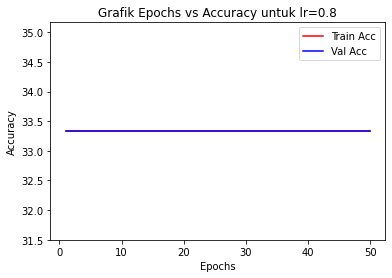

In [51]:
plt.figure()
plt.plot(np.arange(1,51), acc_train, 'r', label='Train Acc')
plt.plot(np.arange(1,51), acc_val, 'b', label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Grafik Epochs vs Accuracy untuk lr=0.8")

Text(0.5, 1.0, 'Grafik Epochs vs Loss untuk lr=0.8')

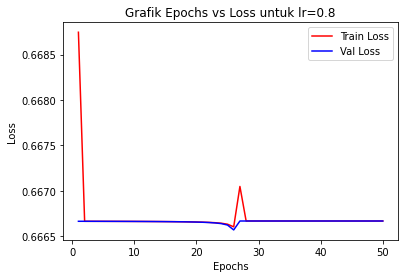

In [52]:
loss_train=np.mean(error_train,axis=1)
loss_val=np.mean(error_val,axis=1)
plt.plot(np.arange(1,51), loss_train, 'r', label='Train Loss')
plt.plot(np.arange(1,51), loss_val, 'b', label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Grafik Epochs vs Loss untuk lr=0.8")